In [1]:
t = 0
s = (0,0)
v = (1,0)
a = (0,0.2)

In [3]:
dt = 2
steps = 5

In [5]:
from vectors import add, scale
positions = [s]
for _ in range(0, steps):
    t += dt
    s = add(s, scale(dt, v))
    v = add(v, scale(dt, a))
    positions.append(s)

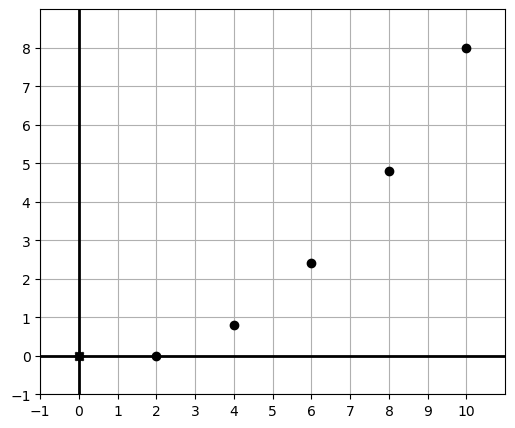

In [7]:
from draw2d import *
draw2d(Points2D(*positions))

In [9]:
def eulars_method(s0, v0, a, total_time, steps):
    positions = [s0]
    dt = total_time/steps
    s = s0
    v = v0
    for _ in range(0, steps):
        s = add(s, scale(dt, v))
        positions.append(s)
        v = add(v, scale(dt, a))
    return positions

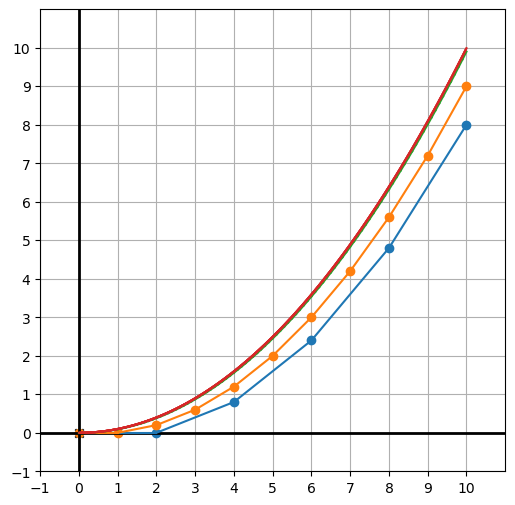

In [25]:
approx5 = eulars_method((0,0), (1,0), (0,0.2), 10, 5)
approx10 = eulars_method((0,0), (1,0), (0,0.2), 10, 10)
approx100 = eulars_method((0,0), (1,0), (0,0.2), 10, 100)
approx1000 = eulars_method((0,0), (1,0), (0,0.2), 10, 1000)

def pairs(lst):
    return list(zip(lst[:-1], lst[1:]))

from draw2d import *
draw2d(
    Points2D(*approx5, color='C0'),
    *[Segment2D(t, h, color='C0') for (t,h) in pairs(approx5)],
    Points2D(*approx10, color='C1'),
    *[Segment2D(t, h, color='C1') for (t,h) in pairs(approx10)],
    *[Segment2D(t, h, color='C2') for (t,h) in pairs(approx100)],
    *[Segment2D(t, h, color='C3') for (t,h) in pairs(approx1000)],
      )

In [27]:
from math import pi, sin, cos
angle = 20 * pi/180
s0 = (0, 1.5)
v0 = (30*cos(angle), 30*sin(angle))
a = (0, -9.81)

result = eulars_method(s0, v0, a, 3, 100)

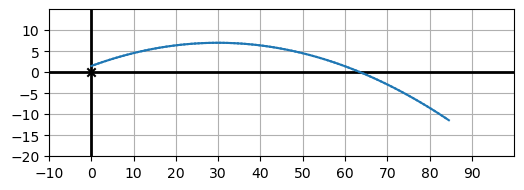

In [49]:
draw2d(
    *[Segment2D(t, h, color='C0') for (t,h) in pairs(result)],
    grid = (10, 5)
)

In [53]:
def baseball_trajectory(degrees):
    radians = degrees * pi/180
    s0 = (0,0)
    v0 = (30*cos(radians), 30*sin(radians))
    a = (0, -9.81)
    return [(x,y) for (x,y) in eulars_method(s0, v0, a, 10, 100) if y>=0]

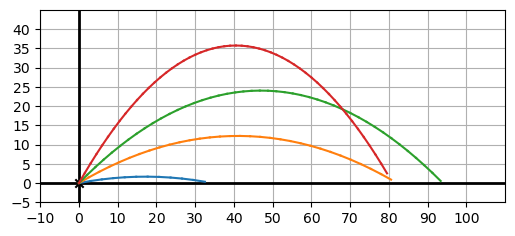

In [57]:
draw2d(
    *[Segment2D(t, h, color='C0') for (t,h) in pairs(baseball_trajectory(10))],
    *[Segment2D(t, h, color='C1') for (t,h) in pairs(baseball_trajectory(30))],
    *[Segment2D(t, h, color='C2') for (t,h) in pairs(baseball_trajectory(45))],
    *[Segment2D(t, h, color='C3') for (t,h) in pairs(baseball_trajectory(60))],
    grid = (10, 5)
)

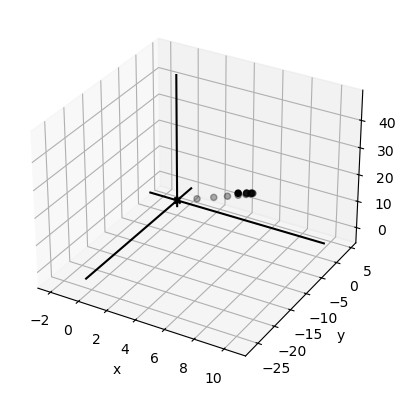

In [67]:
from draw3d import *
traj3d = eulars_method((0,0,0), (1,2,0), (0,-1,1), 10, 10)
draw3d(
    Points3D(*traj3d)
)